In [82]:
# Import libraries
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
# Number of trials
trials = 10000

In [84]:
# Number of independent experiments in each trial
n = 10

# Probability of success for each experiment
p = 0.5

In [85]:
seed(0)
# heads is a list of the number of successes from each trial of n experiments
heads = []
for i in range(trials):
    tosses = [np.random.random() for i in range(n)]
    heads.append(len([i for i in tosses if i>=0.50]))

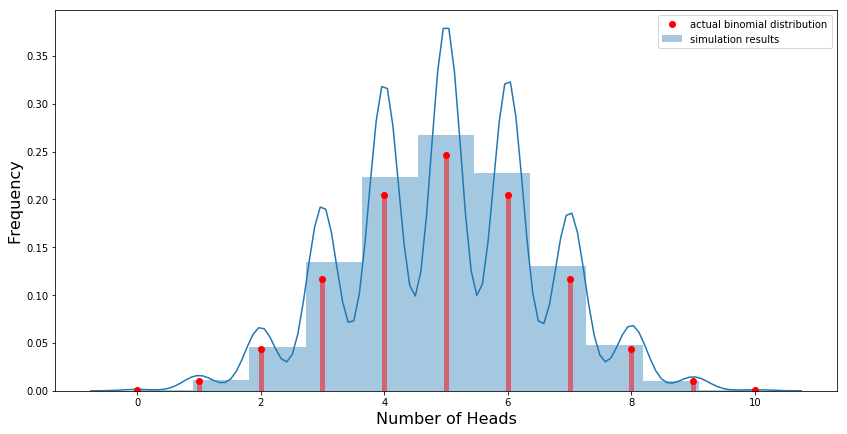

In [86]:
# Plot and save the results as a histogram
fig, ax = plt.subplots(figsize=(14,7))
ax = sns.distplot(heads, bins=11, label='simulation results')

ax.set_xlabel("Number of Heads",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)

# Plot the actual binomial distribution as a sanity check
from scipy.stats import binom
x = range(0,11)
ax.plot(x, binom.pmf(x, n, p), 'ro', label='actual binomial distribution')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='r', lw=5, alpha=0.5)
plt.legend()

# plt.savefig(fname='Binomial_Hist_2', dpi=150)
plt.show()

In [87]:
# Probability of getting 6 heads

runs = 10000
prob_6 = sum([1 for i in np.random.binomial(n, p, size=runs) if i==6])/runs
print('The probability of 6 heads is: ' + str(prob_6))

The probability of 6 heads is: 0.2057


In [88]:
# Call Center Simulation

# Number of employees to simulate
employees = 100

# Cost per employee
wage = 200

# Number of independent calls per employee
n = 55

# Probability of success for each call
p = 0.05

# Revenue per call
revenue = 100

# Binomial random variables of call center employees
conversions = np.random.binomial(n, p, size=employees)

# Print some key metrics of our call center
print('Average Conversions per Employee: ' + str(round(np.mean(conversions), 2)))
print('Standard Deviation of Conversions per Employee: ' + str(round(np.std(conversions), 2)))
print('Total Conversions: ' + str(np.sum(conversions)))
print('Total Revenues: ' + str(np.sum(conversions)*revenue))
print('Total Expense: ' + str(employees*wage))
print('Total Profits: ' + str(np.sum(conversions)*revenue - employees*wage))

Average Conversions per Employee: 2.56
Standard Deviation of Conversions per Employee: 1.37
Total Conversions: 256
Total Revenues: 25600
Total Expense: 20000
Total Profits: 5600


Text(0, 0.5, 'Frequency')

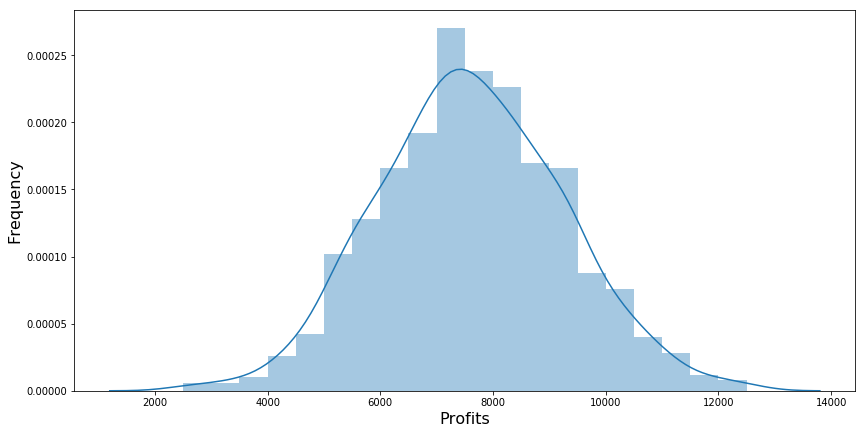

In [89]:
# Simulate 1,000 days for our call center

# Number of days to simulate
sims = 1000

sim_conversions = [np.sum(np.random.binomial(n, p, size=employees)) for i in range(sims)]
sim_profits = np.array(sim_conversions)*revenue - employees*wage

# Plot and save the results as a histogram
fig, ax = plt.subplots(figsize=(14,7))
ax = sns.distplot(sim_profits, bins=20, label='simulation results')

ax.set_xlabel("Profits",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
